In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor #https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans


In [2]:
df1 = pd.read_csv("ds1 (1).csv")
df2 = pd.read_csv("ds2 (1).csv")
df2 = df2.drop(columns=['Unnamed: 0'])
df1 = df1.drop(columns=['Unnamed: 0'])

## 1. Consider data set 1 (ds1.csv). The data set comprises features (the Five xs) along with three sequences that may or may not be generated from the features (3 ys).

### a. Describe the data set in a few sentences. E.g. What are the distributions of each feature? Summary statistics?

In [3]:
df1

x1        x2        x3        x5        x6         ya        yb  \
0      2.642583 -1.715220  1.909334  0.027139 -3.447187  13.630850  1.828765   
1      4.588761 -2.507543  4.239107  1.704150 -2.782809   7.834582  2.162110   
2      7.919796 -5.108415  3.039451  0.992815  5.551587  -5.107041  2.797083   
3      2.616757 -2.124040  2.855570  0.990079  1.694697  19.015046  1.953887   
4      3.300856 -5.159684  0.764544  0.143581  3.277496  -9.818862  1.922446   
...         ...       ...       ...       ...       ...        ...       ...   
99995  4.385227 -4.536328  2.830926  2.292516  4.431597   6.583471  2.379759   
99996  0.972447 -4.508355  0.072768  0.595734  0.335094 -36.866746  0.527708   
99997  6.490640 -1.866173  1.850645  0.456275 -5.556419   7.428092  2.404794   
99998  7.167485 -1.981598  4.119294  0.520821  2.510750  21.136472  2.735631   
99999  9.758491 -2.654220  3.603740  0.392868  0.010298  14.383476  2.996599   

             yc  
0      0.008386  
1      0.000008  
2     -0.000005  
3      0.038017  
4      0.001178  
...         ...  
99995  0.023312  
99996 -0.096336  
99997 -0.002917  
99998  0.000199  
99999 -0.002061  

[100000 rows x 8 columns]

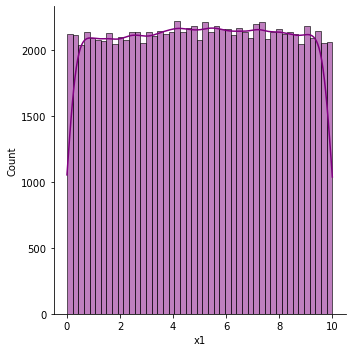

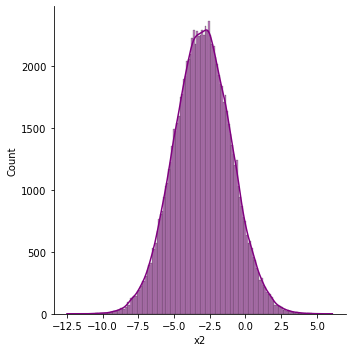

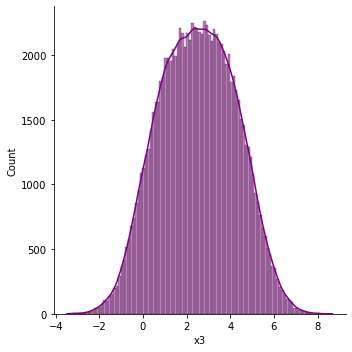

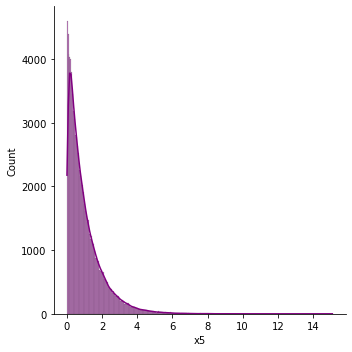

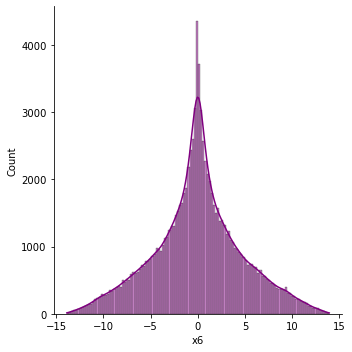

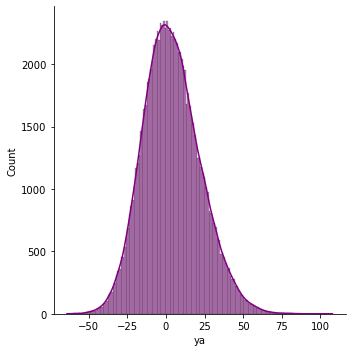

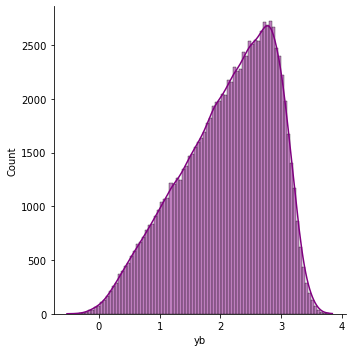

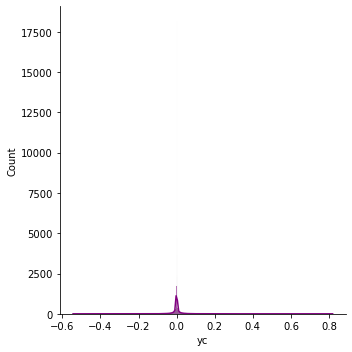

In [4]:
for c in df1.columns:
    sns.displot(data=df1, x=c, kde = True,color='purple')

**Summary statistics:**

In [5]:
df1.describe()

x1             x2             x3             x5  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        5.011059      -3.005565       2.500593       0.999136   
std         2.873568       2.000799       1.752906       1.002006   
min         0.000015     -12.498524      -3.489212       0.000003   
25%         2.536309      -4.353844       1.189920       0.285629   
50%         5.022191      -3.002649       2.503764       0.690903   
75%         7.486275      -1.649283       3.802236       1.386862   
max         9.999887       6.089820       8.679097      15.102966   

                  x6             ya             yb            yc  
count  100000.000000  100000.000000  100000.000000  1.000000e+05  
mean        0.000647       3.827867       2.111854  1.022765e-04  
std         4.663860      18.438514       0.769306  3.121215e-02  
min       -13.885453     -64.021995      -0.523672 -5.433613e-01  
25%        -2.611943      -8.998020       1.580212 -2.423159e-03  
50%        -0.000611       2.666992       2.231057 -5.670000e-10  
75%         2.621841      15.579687       2.733318  2.476745e-03  
max        13.924740     107.713997       3.841363  8.183882e-01

**Correlations among variables:**

In [6]:
corrM = df1.corr()
display(corrM)

x1        x2        x3        x5        x6        ya        yb  \
x1  1.000000 -0.001753  0.821154  0.004544  0.000741  0.465431  0.945973   
x2 -0.001753  1.000000 -0.002167  0.000493  0.000747  0.675648 -0.001495   
x3  0.821154 -0.002167  1.000000  0.002429  0.001369  0.411148  0.775455   
x5  0.004544  0.000493  0.002429  1.000000  0.000746  0.002463  0.004666   
x6  0.000741  0.000747  0.001369  0.000746  1.000000  0.001964  0.001163   
ya  0.465431  0.675648  0.411148  0.002463  0.001964  1.000000  0.572271   
yb  0.945973 -0.001495  0.775455  0.004666  0.001163  0.572271  1.000000   
yc  0.002746  0.000495 -0.001078  0.002866 -0.000150  0.421504  0.203275   

          yc  
x1  0.002746  
x2  0.000495  
x3 -0.001078  
x5  0.002866  
x6 -0.000150  
ya  0.421504  
yb  0.203275  
yc  1.000000

<AxesSubplot:>

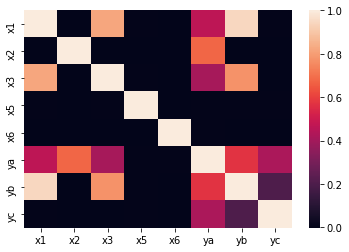

In [7]:
sns.heatmap(corrM, 
        xticklabels=corrM.columns,
        yticklabels=corrM.columns)

**Descriptions of Data (Main Observations):** 

Summary statistics shown in table above

From the summary statistics, we can see that:
- ya has the largest variance out of any of the variables
- x1 has the largest mean
- x2 has the smallest mean (most negative)

From the correlation matrix and heatmap, we can see the following correlations:
- x1 and x3 (very strong)
- ya and x1
- ya and x2
- ya and x2
- yb and x1
- yb and x3

We also observe that yc has a very low correlation (~0) for all of the x variables and a weak correlation with both ya and yb. X5 and X6 appear to have no correlation with any of the other variables in the data set. 


Distributions of each feature (graphically observed from probability distribution plots):
- x1 has an uniform distribution  
- x2 has a normal distribution (centered at -2)  
- x3 has a normal distribution (centered at 3)  
- x5 appears to have a log-normal distribution  
- x6 appears to have a Laplace distribution  
- ya appears to have a standard normal distribution,   
- yb has a skewed (negatively) distribution  
- yc appears to have a Laplace distribution

### b. Try to come up with a predictive model, e.g. y = f(x_1 , … , x_n) for each y sequence. Describe your models and how you came up with them. What (if any) are the predictive variables? How good would you say each of your models is?

<font color='red'>ya model:</font>


From the descriptive statistics table in part a, we can see that ya has the largest variance out of all of the predictors, and it has a large range (-64 to 107). Therefore, there are likely many outliers present, so overfitting is a major concern and should be taken into consideration when deciding on a predictive model. Because of the high variance, inflexible models, such as linear regression, are preferable, so I will use this approach as a starting point.

From the correlation matrix above, we can see that ya is correlated with x1, x2, and x3.   

However, x1 and x3 are also correlated (there is multicollinearity present). Looking at the Variance Inflation Factor (VIF) will give us a better idea of how strong the correlation between x1 and x3 is.

In [8]:
X = df1[['x1','x2','x3']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

  feature        VIF
0      x1  10.421744
1      x2   2.092730
2      x3   9.318138


x1 and x3 have high VIF values. If x3 is removed:

In [9]:
X = df1[['x1','x2']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

  feature       VIF
0      x1  2.092723
1      x2  2.092723


Multicollinearity issue is gone. (almost - x1 and x2 are correlated because VIF > 1, but using these two variables as predictors for ya is a good starting point)

Let's try creating a model with just x1 and x2 to predict ya.   

From the plots below, we can graphically observe that x2 and ya seem to have a linear relationship, and x1 and ya seem to have an exponential relationship (with high variance).

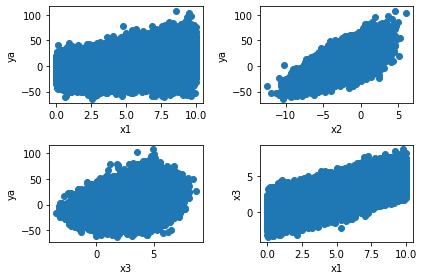

In [10]:
f, axarr = plt.subplots(2, 2)
axarr[0, 0].scatter(df1['x1'], df1['ya'])
axarr[0, 0].set_xlabel('x1')
axarr[0, 0].set_ylabel('ya')

axarr[0, 1].scatter(df1['x2'], df1['ya'])
axarr[0, 1].set_xlabel('x2')
axarr[0, 1].set_ylabel('ya')

axarr[1, 0].scatter(df1['x3'], df1['ya'])
axarr[1, 0].set_xlabel('x3')
axarr[1, 0].set_ylabel('ya')

axarr[1, 1].scatter(df1['x1'], df1['x3'])
axarr[1, 1].set_xlabel('x1')
axarr[1, 1].set_ylabel('x3')

f.tight_layout()

In [11]:
lr_model = smf.ols('ya ~ np.exp(x1) + x2', data=df1).fit()
display(lr_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ya   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                 6.737e+04
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:36:31   Log-Likelihood:            -3.9067e+05
No. Observations:              100000   AIC:                         7.813e+05
Df Residuals:                   99997   BIC:                         7.814e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3975      0.071    272.291      0.000      19.258      19.537
np.exp(x1)     0.0014   8.71e-06    166.091      0.000       0.001       0.001
x2             6.2301      0.019    327.543      0.000       6.193       6.267
==============================================================================
Omnibus:                       74.693   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.853
Skew:                          -0.067   Prob(JB):                     5.57e-17
Kurtosis:                       2.997   Cond. No.                     9.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
lr_model = smf.ols('ya ~ x1 + x2', data=df1).fit()
display(lr_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ya   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                 1.035e+05
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:36:31   Log-Likelihood:            -3.7726e+05
No. Observations:              100000   AIC:                         7.545e+05
Df Residuals:                   99997   BIC:                         7.546e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5611      0.083     90.600      0.000       7.398       7.725
x1             2.9941      0.012    258.522      0.000       2.971       3.017
x2             6.2340      0.017    374.787      0.000       6.201       6.267
==============================================================================
Omnibus:                       39.730   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.617
Skew:                           0.038   Prob(JB):                     1.51e-09
Kurtosis:                       3.062   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 value is higher when we assume a linear relationship between x1 and ya rather than an exponential one.

R^2 value is 0.674 which indicates that the linear regression model fits the data well, but not perfectly. However, as mentioned previously, ya has a lot of variance, and we want to avoid overfitting the data, so this R^2 value seems reasonable in this case. However, without further context on exactly what the variables are (and how important the accuracy of the model is), it is difficult to judge whether a model with higher bias would be more appropriate for the current business problems.

other note: the p-value for each variable in the regression equation is less than 0.05, so each one is statistically significant.

Final model: **ya = 2.9941x1 + 6.2340x2 + 7.5611**   
**predictive variables for ya: x1 and x2**  


Approach Summary:
- began with linear regression because the predicted variable has high variance, so an inflexible model is preferable
- plotted  the relationship between the predicted variable (ya) and the predictors (x1, x2, and x3), and then narrowed the predictors down to x1 and x2 to eliminate issues caused by multicollinearity
- used x1 and x2 in linear regession model and got an R^2 value of 0.674.
- also tried the linear regression model with x1, x2, x3, and x1(x3) as variables, but the R^2 score was only a 0.004 increase (0.678), so I decided to go with the model that only contains two variables for more simplicity.


Other considerations:
- simplicity and implementability

Simplicity and implementability are important factors to consider when building models as shareholders, business leaders, and other team members with non-technical backgrounds should typically also be able to follow along with the methods and results, and linear regression is a great way to achieve this.

<font color='red'>yb model:</font>


yb: There is a correlation between yb and x1 and yb and x3. However, x1 and x3 are also correlated with one another (there is multicollinearity present).

yb has a higher correlation with x1 than x3, so I will start with a linear regression model using x1 as the predictor for yb.

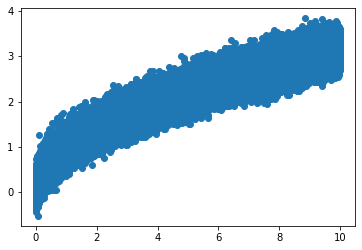

In [13]:
plt.scatter(df1['x1'],df1['yb'])

From this plot, we can graphically observe that the relationship between x1 and yb appears to be: yb = c*sqrt(x1), so I will begin by using this relationship in a linear regression model.

In [14]:
lr_model = smf.ols('yb ~ np.sqrt(x1)', data=df1).fit()
display(lr_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     yb   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.378e+06
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:36:32   Log-Likelihood:                 19001.
No. Observations:              100000   AIC:                        -3.800e+04
Df Residuals:                   99998   BIC:                        -3.798e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0021      0.002     -1.102      0.271      -0.006       0.002
np.sqrt(x1)     1.0010      0.001   1173.917      0.000       0.999       1.003
==============================================================================
Omnibus:                        3.781   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.770
Skew:                           0.014   Prob(JB):                        0.152
Kurtosis:                       3.009   Cond. No.                         7.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value for the intercept is greater than 0.05, so it is not statistically significant.

Try creating the model with no intercept:

In [15]:
lr_model = smf.ols('yb ~ np.sqrt(x1) - 1', data=df1).fit()
#syntax for removing intercept (the -1): https://stackoverflow.com/questions/54257216/how-to-set-intercept-to-0-with-statsmodel-for-multiple-linear-regression
display(lr_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     yb   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                          1.252e+07
Date:                Sun, 09 Oct 2022   Prob (F-statistic):                        0.00
Time:                        19:36:32   Log-Likelihood:                          19000.
No. Observations:              100000   AIC:                                 -3.800e+04
Df Residuals:                   99999   BIC:                                 -3.799e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
np.sqrt(x1)     1.0001      0.000   3537.892      0.000       1.000       1.001
==============================================================================
Omnibus:                        3.724   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.155   Jarque-Bera (JB):                3.713
Skew:                           0.014   Prob(JB):                        0.156
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the table above, R-squared is 0.992 (very close to 1), so the regression line is a great predictor for yb.  

**The regression line is: yb = 1.0001*sqrt(x1)**  
**Predictive variable for yb: sqrt(x1)**

<font color='red'>yc model:</font>


There is zero correlation between yc and all of the x variables, so it cannot be generated/predicted from the predictors in the data set. (determined from the correlation heatmap in part a)

In [16]:
lr_model = smf.ols('yc ~ x1 + x2 + x3 + x5 + x6', data=df1).fit()
display(lr_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     yc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9993
Date:                Sun, 09 Oct 2022   Prob (F-statistic):              0.416
Time:                        19:36:32   Log-Likelihood:             2.0480e+05
No. Observations:              100000   AIC:                        -4.096e+05
Df Residuals:                   99994   BIC:                        -4.095e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0001      0.000     -0.427      0.669      -0.001       0.000
x1             0.0001   6.02e-05      2.008      0.045    2.87e-06       0.000
x2          7.659e-06   4.93e-05      0.155      0.877    -8.9e-05       0.000
x3            -0.0002   9.87e-05     -1.844      0.065      -0.000    1.14e-05
x5          8.846e-05   9.85e-05      0.898      0.369      -0.000       0.000
x6         -9.798e-07   2.12e-05     -0.046      0.963   -4.25e-05    4.05e-05
==============================================================================
Omnibus:                    38901.894   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8034394.166
Skew:                           0.721   Prob(JB):                         0.00
Kurtosis:                      46.888   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Each variable's p-value is greater than 0.05, so each is not a statistically significant predictor of yc.

**Conclusion: There are no predictive variables for yc in the given dataset.**

<hr>

## 2. Consider data set 2 (ds2.csv). The dataset comprises a set of observations that correspond to multiple groups.

### a. Describe the data in a few sentences

In [17]:
df2

X1         X2         X3         X4         X5         X6  \
0     23.778224  13.319974  15.565124  -3.713626   7.296793 -19.371013   
1     16.602950  23.311281  21.099052  -0.304154  -3.218990   2.357643   
2     12.084683  19.710443   9.837102  -1.081918  -1.201942   9.738019   
3     13.044534  10.749040   5.884407 -11.703525  -4.134358 -22.344666   
4      8.314115   6.748794   5.388535  -0.000290  -4.724787 -16.346812   
...         ...        ...        ...        ...        ...        ...   
1995   7.938971  14.415032  10.410805   0.596848   0.754864 -22.318668   
1996  12.296486   9.133867   6.703856   3.074668  -4.969635  19.249157   
1997   9.958681   2.660313  20.833856 -13.244253  19.291720  -9.732882   
1998 -10.355833  15.105070  -5.705684   7.196082   0.849879  19.485150   
1999  16.033693  14.308373  12.222013  -9.343368  -2.822996 -15.729261   

             X7         X8         X9        X10  
0     -0.894130  -6.110282 -28.959316   2.851336  
1     12.027277   7.070349  -5.762185 -23.050198  
2     16.125920  19.119391 -15.582122 -12.292535  
3     -1.263349   0.493711 -15.305347   6.799087  
4      3.293600 -10.848273 -17.285491   6.034214  
...         ...        ...        ...        ...  
1995   1.326246  -5.919270 -14.141233   2.284455  
1996  13.643448   8.458500 -18.058443 -22.983281  
1997  -3.350364   3.186218 -18.598822  20.423716  
1998  11.989341  26.697433  -0.763111  -5.759242  
1999   6.376017  -6.680791 -14.146463  -2.226976  

[2000 rows x 10 columns]

**summary statistics:**

In [18]:
df2.describe()

X1           X2           X3           X4           X5  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      8.677829    11.716801     9.252817    -2.679634     2.774942   
std      11.971827     6.655333     9.861443    10.625164     8.800553   
min     -25.824199    -8.497562   -23.666439   -29.429655   -22.033329   
25%       0.231327     7.161564     2.648845   -10.652694    -4.098043   
50%      12.754335    11.896021    11.422441    -2.631318     2.484416   
75%      17.364337    16.279210    16.503676     5.340314     9.660898   
max      32.268570    32.909917    31.230550    26.422798    29.312010   

                X6           X7           X8           X9          X10  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean      0.077631     8.200884     8.712878   -12.860135    -1.339360  
std      15.375478    10.426023     9.881482     8.881026    14.534143  
min     -35.264019   -21.428538   -16.811146   -36.065150   -36.468083  
25%     -14.003670    -0.812888     1.480706   -19.430697   -13.216190  
50%       1.500838     8.532535     9.628064   -14.417786    -2.094310  
75%      14.050512    17.138898    16.081044    -6.534142    10.561797  
max      31.727042    32.084297    36.847922    13.553705    32.641789

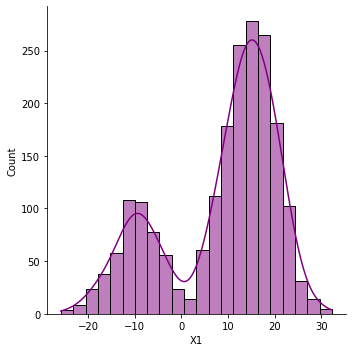

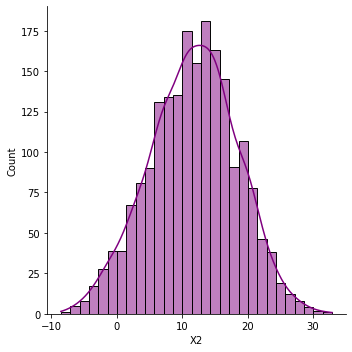

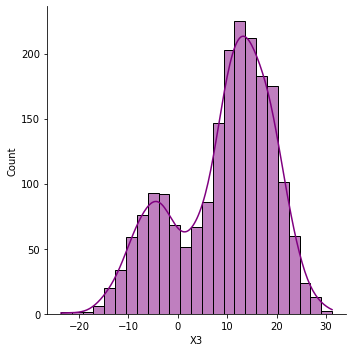

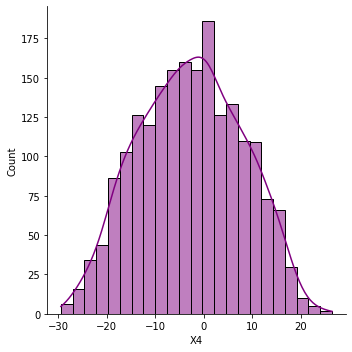

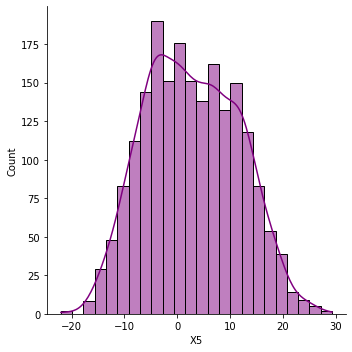

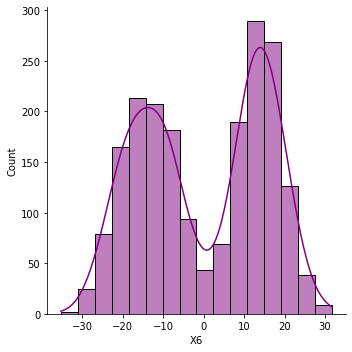

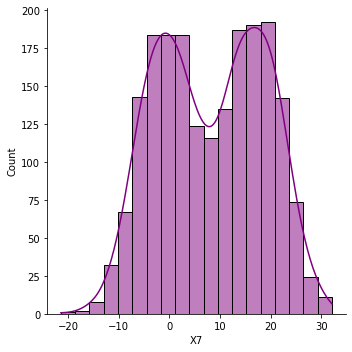

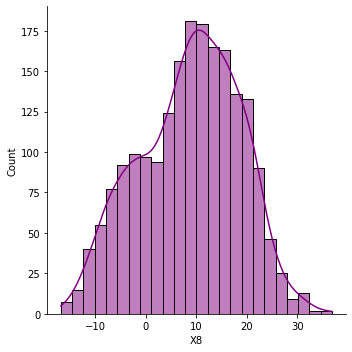

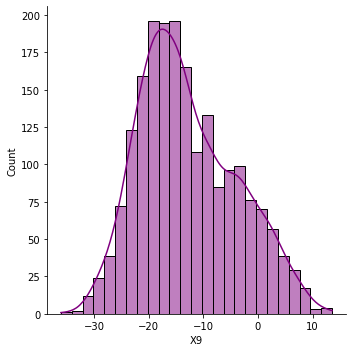

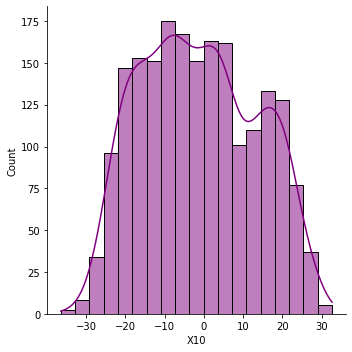

In [19]:
for c in df2.columns:
    sns.displot(data=df2, x=c, kde=True,color='purple')

**Correlations among variables:**

In [20]:
corrM = df2.corr()
corrM

X1        X2        X3        X4        X5        X6        X7  \
X1   1.000000 -0.336911  0.743385 -0.567528 -0.280974 -0.494914 -0.316441   
X2  -0.336911  1.000000 -0.405233  0.588871 -0.244078  0.473964  0.540085   
X3   0.743385 -0.405233  1.000000 -0.632856 -0.068948 -0.440832 -0.351975   
X4  -0.567528  0.588871 -0.632856  1.000000 -0.192661  0.641886  0.678063   
X5  -0.280974 -0.244078 -0.068948 -0.192661  1.000000  0.120699 -0.202808   
X6  -0.494914  0.473964 -0.440832  0.641886  0.120699  1.000000  0.739191   
X7  -0.316441  0.540085 -0.351975  0.678063 -0.202808  0.739191  1.000000   
X8  -0.581710  0.281949 -0.431649  0.430786  0.411262  0.727217  0.469389   
X9  -0.659637  0.467640 -0.622713  0.684994  0.063262  0.682713  0.581720   
X10  0.120390 -0.544131  0.235727 -0.630633  0.432553 -0.655046 -0.769429   

           X8        X9       X10  
X1  -0.581710 -0.659637  0.120390  
X2   0.281949  0.467640 -0.544131  
X3  -0.431649 -0.622713  0.235727  
X4   0.430786  0.684994 -0.630633  
X5   0.411262  0.063262  0.432553  
X6   0.727217  0.682713 -0.655046  
X7   0.469389  0.581720 -0.769429  
X8   1.000000  0.597339 -0.270553  
X9   0.597339  1.000000 -0.461024  
X10 -0.270553 -0.461024  1.000000

<AxesSubplot:>

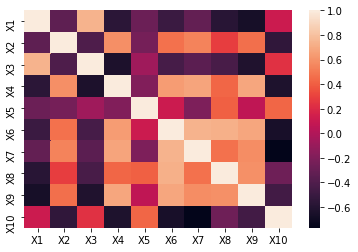

In [21]:
sns.heatmap(corrM, xticklabels=corrM.columns, yticklabels=corrM.columns)

**Descriptions of Data (Main Observations):** 

Summary statistics shown in table above.
- x6 and x10 have the most variance 
- x9 has the smallest mean (most negative)
- x2 has the largest mean (most positive)

Distributions of variables (graphically observed from probability distribution plots):
- x1 = bimodal  
- x2 = normal (shifted right)  
- x3 = bimodal  
- x4 = normal (shifted left)  
- x5 = positively skewed normal distribution  
- x6 = bimodal
- x7 = bimodal
- x8 = negatively skewed normal distribution
- x9 = approximately a normal distribution (centered at ~ x9 = -18)
- x10 = approximately a continuous distribution, especially in the x =(-22,10) range

The data appears to have several variables that are highly correlated with one another (as seen from the correlation heatmap above).

### b. How would you visualize this data set?

Pairplot which shows how the data is distributed among all pairings of variables in the original dataset. 

Useful to get a general idea of how many groups are present in the dataset (from here, it looks like we will likely have at least 3 different groups without having to do any analyses yet)

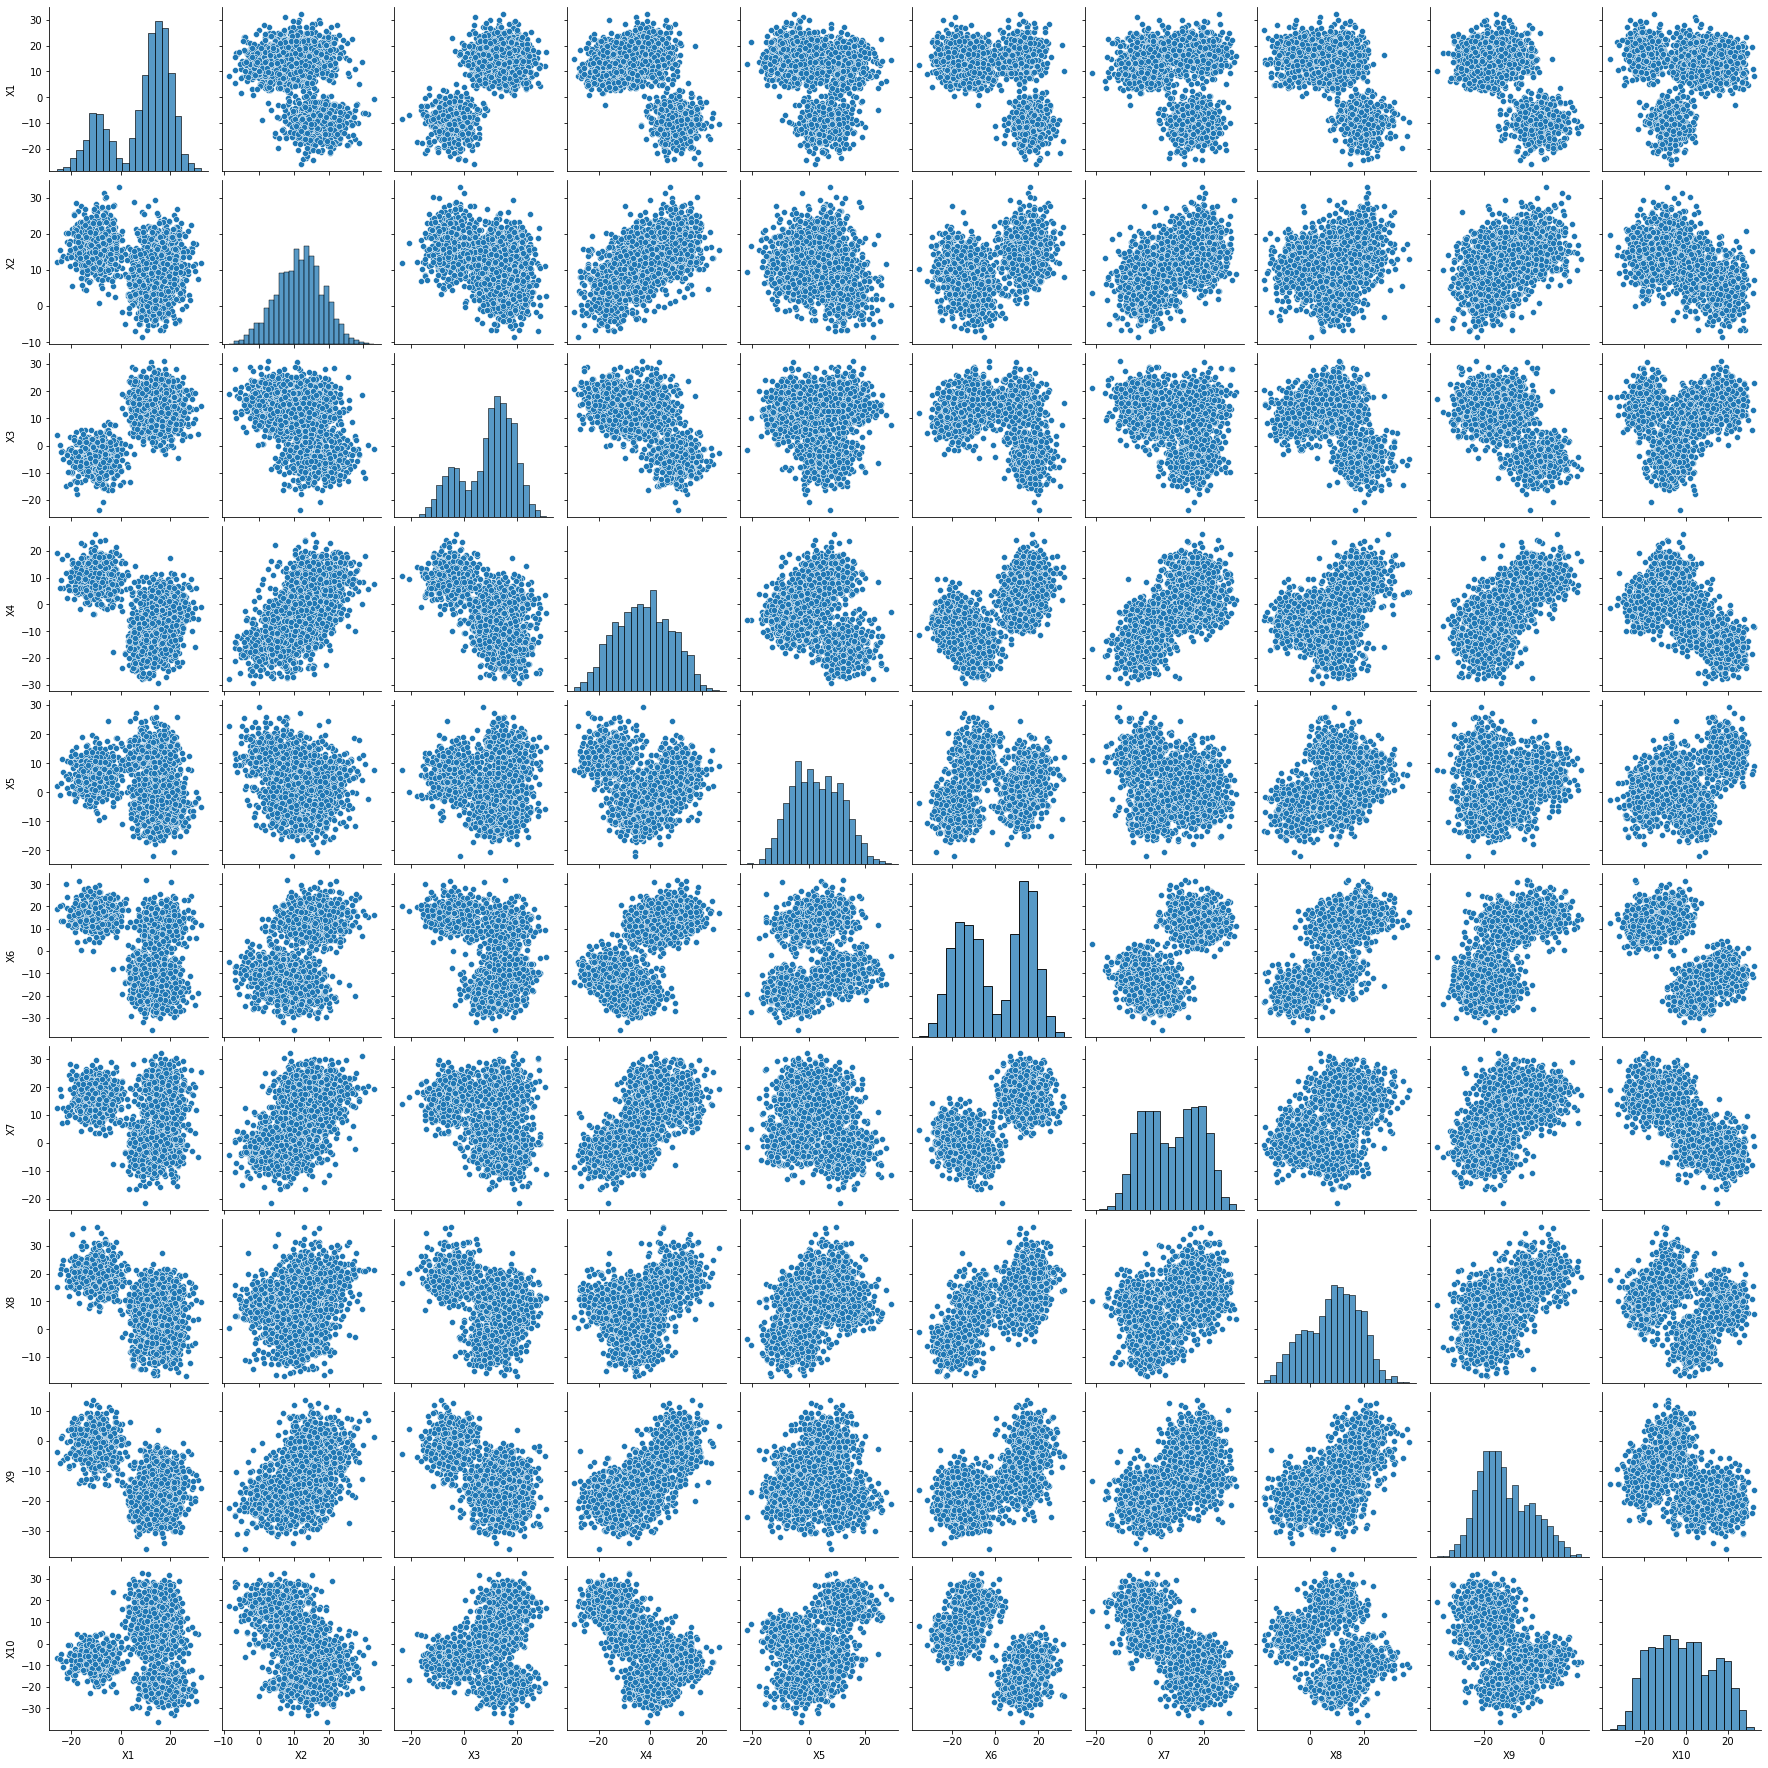

In [22]:
sns.pairplot(df2)

### c. Can you identify the number of groups in the data and assign each row to its group?

From the correlation matrix above, we can see that there is correlation/covariance present among several of the variables. Therefore, it makes sense to use the Principal Component Analysis method to reduce the number of features present. This will make our k-means model faster to run, and it will make our results more interpretable.

In [23]:
df2_std = StandardScaler().fit_transform(df2)

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(df2_std)

features = range(pca.n_components_)
PCA_components = pd.DataFrame(principalComponents)

[0.52418794 0.71693817 0.81648399 0.86683285 0.8968736  0.92411936
 0.94683847 0.96802794 0.98725367 1.        ]


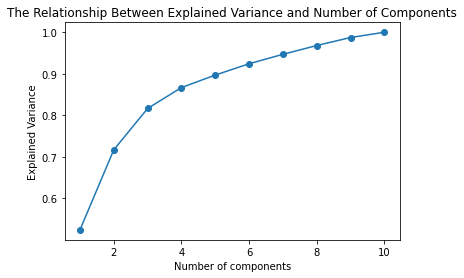

In [24]:
plt.plot(range(1,11),pca.explained_variance_ratio_.cumsum(), marker = 'o')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.title('The Relationship Between Explained Variance and Number of Components')

print(pca.explained_variance_ratio_.cumsum())

From the above graph, we can see that 3 components explain ~82% of the total variance, so we will keep 3 components for the next step (k-means clustering).

Text(0, 0.5, 'Inertia')

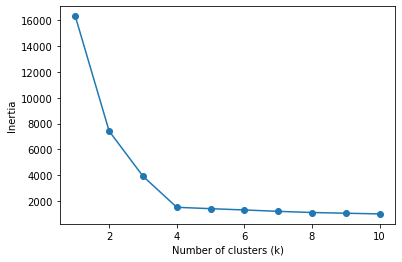

In [25]:
inertias = []

for k in range(1,11):
    kmeanModel = KMeans(n_clusters=k).fit(PCA_components.iloc[:,:3])
    inertias.append(kmeanModel.inertia_)
    
plt.plot(range(1,11), inertias, '-o', )
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

**Using the elbow method, we determine that the optimal number of clusters (groups) for this dataset is 4.**

**Below is the original dataset with a group assigned for each row**

In [26]:
optimal_kmeans = KMeans(n_clusters=4, random_state=0).fit(PCA_components.iloc[:,:3])
df2['group'] = optimal_kmeans.labels_
df2

X1         X2         X3         X4         X5         X6  \
0     23.778224  13.319974  15.565124  -3.713626   7.296793 -19.371013   
1     16.602950  23.311281  21.099052  -0.304154  -3.218990   2.357643   
2     12.084683  19.710443   9.837102  -1.081918  -1.201942   9.738019   
3     13.044534  10.749040   5.884407 -11.703525  -4.134358 -22.344666   
4      8.314115   6.748794   5.388535  -0.000290  -4.724787 -16.346812   
...         ...        ...        ...        ...        ...        ...   
1995   7.938971  14.415032  10.410805   0.596848   0.754864 -22.318668   
1996  12.296486   9.133867   6.703856   3.074668  -4.969635  19.249157   
1997   9.958681   2.660313  20.833856 -13.244253  19.291720  -9.732882   
1998 -10.355833  15.105070  -5.705684   7.196082   0.849879  19.485150   
1999  16.033693  14.308373  12.222013  -9.343368  -2.822996 -15.729261   

             X7         X8         X9        X10  group  
0     -0.894130  -6.110282 -28.959316   2.851336      3  
1     12.027277   7.070349  -5.762185 -23.050198      2  
2     16.125920  19.119391 -15.582122 -12.292535      2  
3     -1.263349   0.493711 -15.305347   6.799087      3  
4      3.293600 -10.848273 -17.285491   6.034214      3  
...         ...        ...        ...        ...    ...  
1995   1.326246  -5.919270 -14.141233   2.284455      3  
1996  13.643448   8.458500 -18.058443 -22.983281      2  
1997  -3.350364   3.186218 -18.598822  20.423716      1  
1998  11.989341  26.697433  -0.763111  -5.759242      0  
1999   6.376017  -6.680791 -14.146463  -2.226976      3  

[2000 rows x 11 columns]

### d. Can you create a good visualization of your groupings?

**Visualization of how the different groups are distributed among different pairings of variables in the original dataset**

(Visualization from part a, but with the different groups clearly labelled)

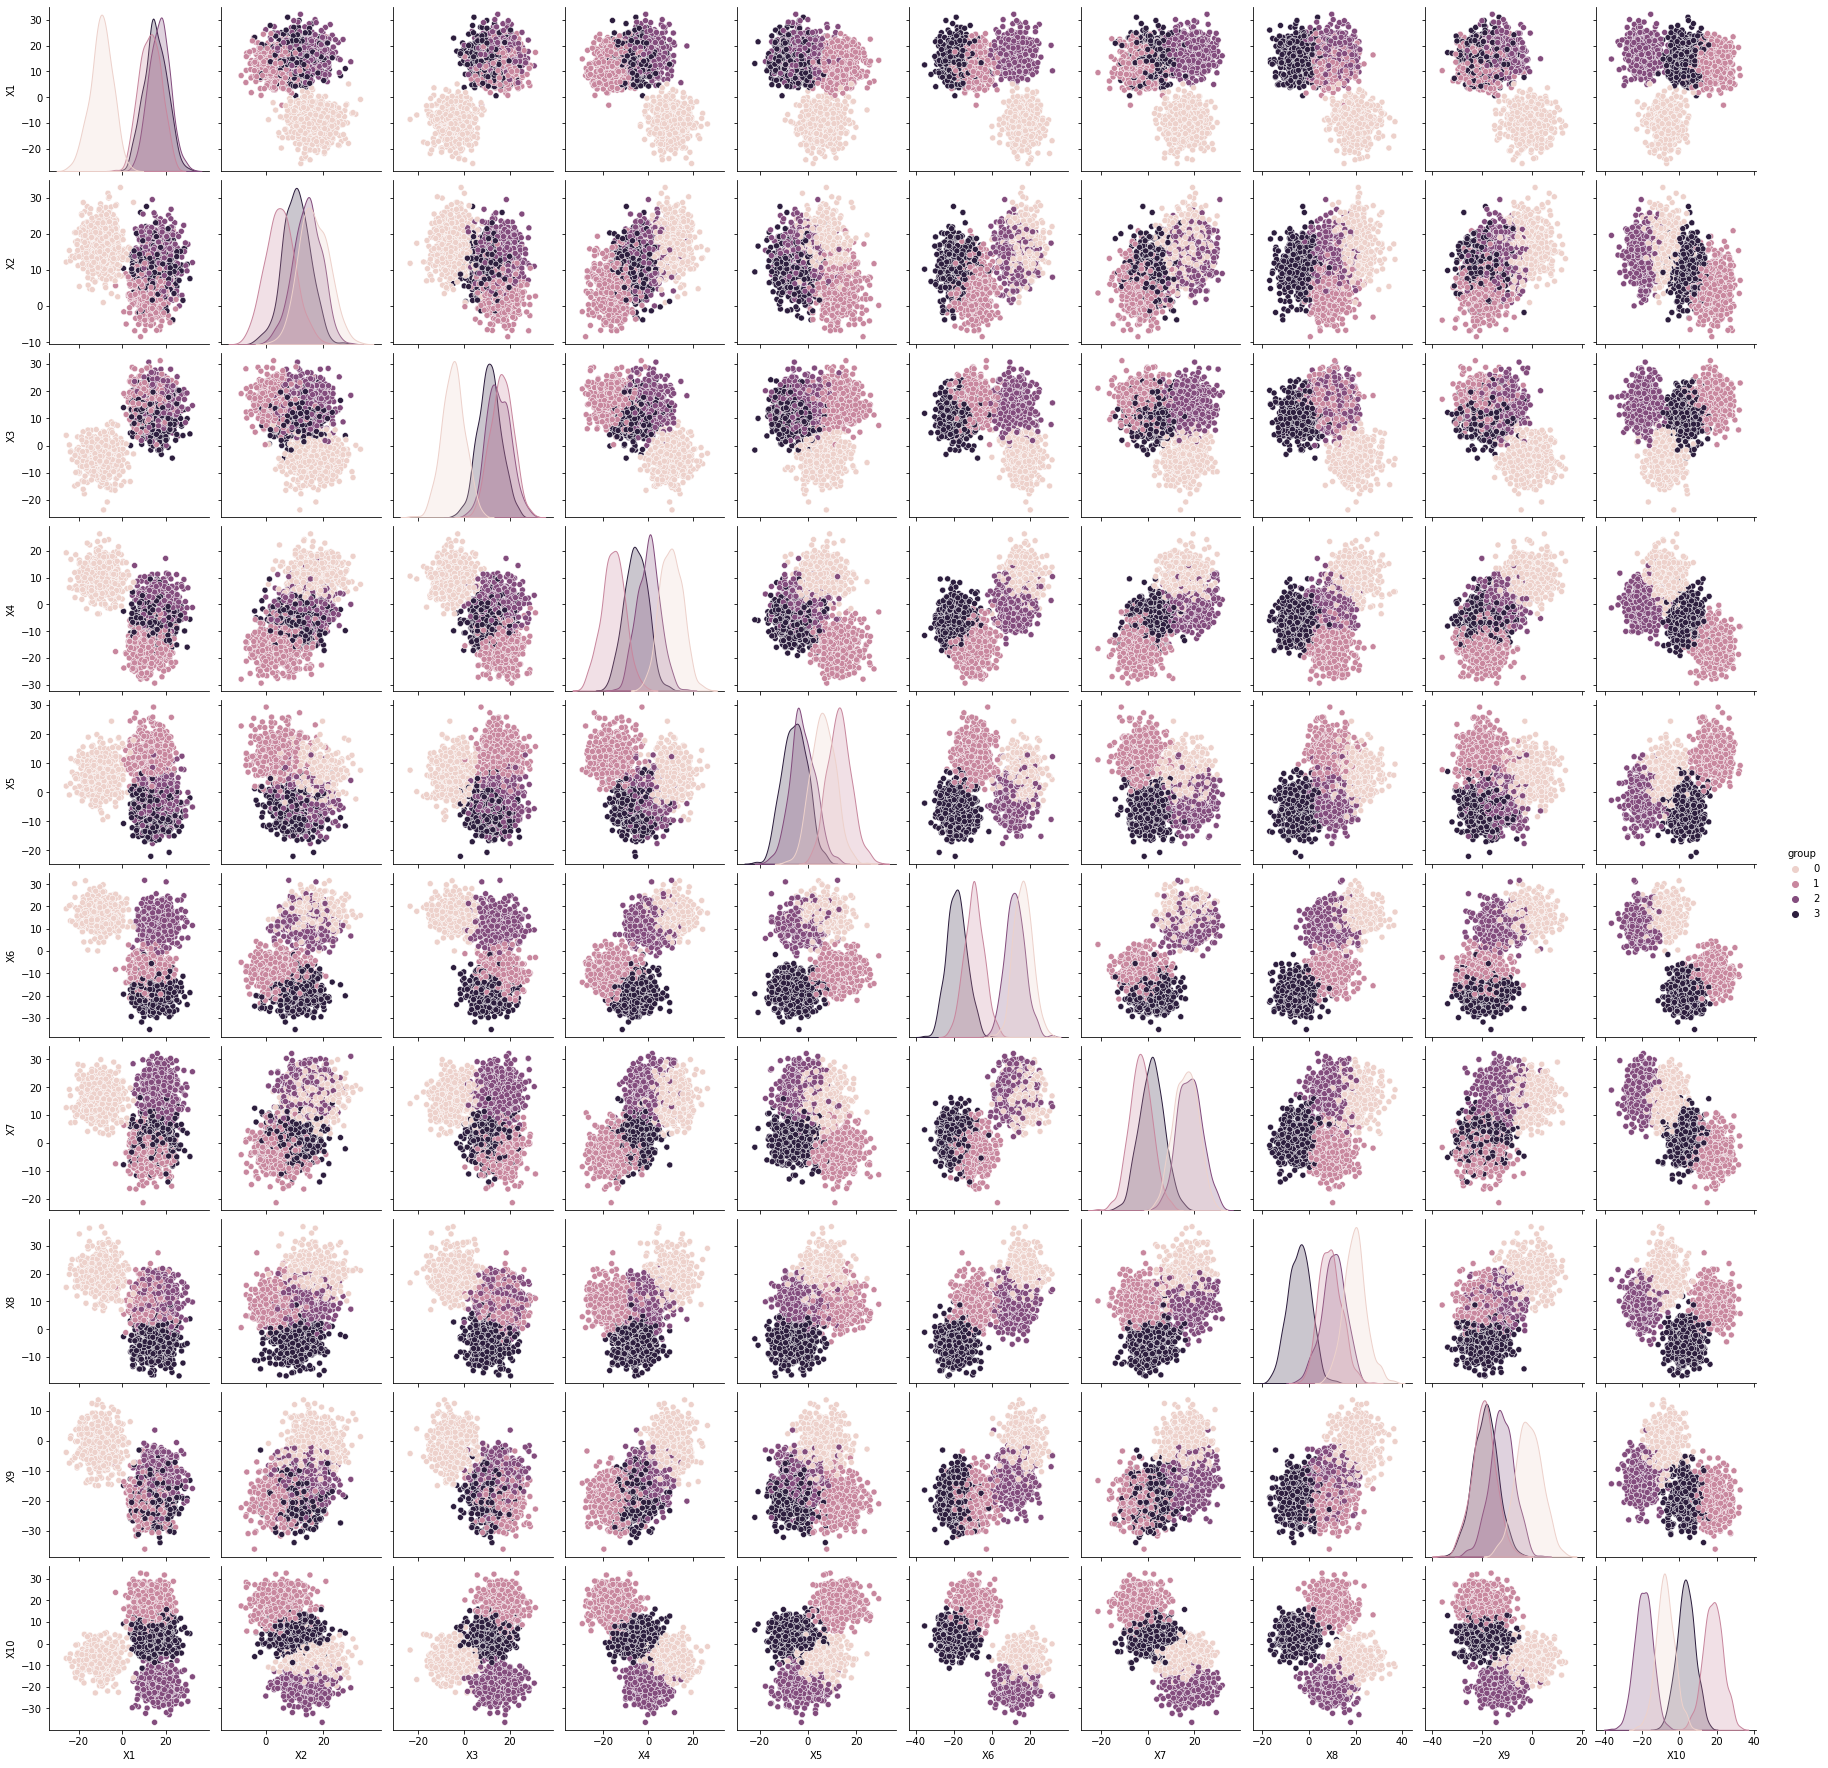

In [27]:
sns.pairplot(df2,hue='group')

**Visualization of how the different groups are distributed among the new components created during PCA.**

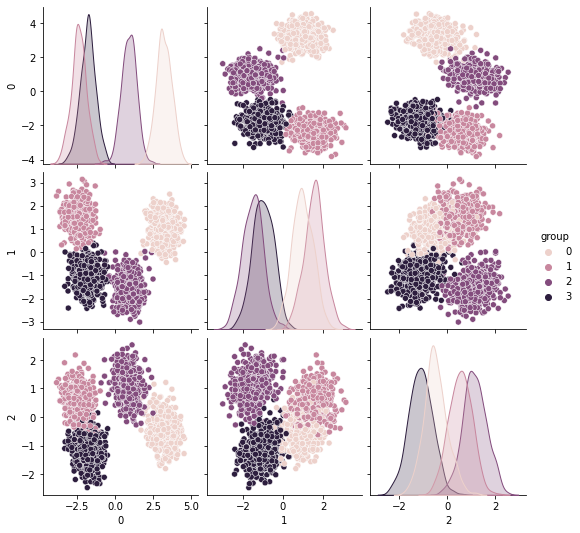

In [28]:
PCA_components = PCA_components.iloc[:,:3]
PCA_components['group'] = optimal_kmeans.labels_
sns.pairplot(PCA_components,hue = 'group')

<hr>

## 3. Stack Overflow provides a tool at https://data.stackexchange.com/stackoverflow/query/new that allows SQL queries to be run against their data. After reviewing the database schema provided on their site, please answer the questions below by providing both your answer and the query used to derive it.

### a. How many posts were created in 2017?

**Query:**

SELECT COUNT(DISTINCT id) FROM posts WHERE YEAR(creationDate) = 2017; 

**Result:**   
5026370

### b. What post/question received the most answers?

**Query:**  
    
SELECT id, AnswerCount, Title FROM Posts   
WHERE AnswerCount = (SELECT Max(AnswerCount) FROM Posts);
 
**Result:**   
id    | AnswerCount | Title  
184618| 518         |What is the best comment in source code you have ever encountered?

### c. For posts created in 2020, what were the top 10 tags?

**Query:**  
    
SELECT TagName, Id FROM Tags Inner JOIN (  
SELECT top 10 TagId, COUNT(TagId) AS c FROM  
PostTags   
INNER JOIN   
(Select * FROM Posts  
WHERE Year(CreationDate) = 2020) AS p   
ON p.Id = PostTags.PostId  

GROUP BY TagId  
ORDER BY c DESC  
)   
AS a  
ON Tags.Id = a.TagId  

**Result:**  

python   
javascript  
java  
c#  
reactjs  
html  
android  
php  
python-3.x  
r  